# MSA 2024 Phase 2 - Part 2

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

## 1. Load and split preprocessed data

In [24]:
df = pd.read_csv("store_sales.csv", encoding='ISO-8859-1')

### Description of the Dataset
The dataset contains the following features:

Row ID: Identifier for each row.
Order ID: Identifier for each order.
Order Date: Date when the order was placed.
Ship Date: Date when the order was shipped.
Ship Mode: Shipping mode (e.g., Second Class, Standard Class).
Customer ID: Identifier for each customer.
Customer Name: Name of the customer.
Segment: Segment of the customer (e.g., Consumer, Corporate, Home Office).
Country: Country of the customer.
City: City of the customer.
State: State of the customer.
Postal Code: Postal code of the customer.
Region: Region of the customer.
Product ID: Identifier for each product.
Category: Category of the product (e.g., Furniture, Office Supplies).
Sub-Category: Sub-category of the product (e.g., Bookcases, Chairs).
Product Name: Name of the product.
Sales: Sales amount for the product.
Quantity: Quantity of the product ordered.
Discount: Discount applied to the product.
Profit: Profit earned from the product (target variable).

Target Variable: Profit.

In [25]:
# Convert date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

# Extract useful features from datetime columns
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day
df['Ship_Year'] = df['Ship Date'].dt.year
df['Ship_Month'] = df['Ship Date'].dt.month
df['Ship_Day'] = df['Ship Date'].dt.day

# Drop original datetime columns
df.drop(['Order Date', 'Ship Date'], axis=1, inplace=True)

# Convert categorical columns to numerical codes
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes


# Define features and target variable
X = df.drop('Profit', axis=1)
y = df['Profit']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Choose an algorithm

In [26]:
# Initialize the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

Decision Tree Regression is a supervised learning algorithm used for predicting continuous values. 

Splitting: The algorithm starts at the root of the tree with the entire dataset and splits it into subsets based on feature values. It looks for the split that results in the most homogeneous subsets, aiming to reduce the variance within each subset.

Creating Nodes: Each split creates a decision node. The process of splitting continues recursively, creating more nodes, until a stopping criterion is met (e.g., maximum depth of the tree, minimum number of samples in a node).

Leaf Nodes: The end points of the tree are called leaf nodes. Each leaf node represents a value that is the average of the target variable values (e.g., profit) of the data points that fall into that leaf.

Prediction: To make a prediction for a new data point, the model starts at the root and traverses the tree based on the feature values of the data point until it reaches a leaf node. The value at that leaf node is the predicted value.

## 3. Train and test a model

In [27]:
# Train the model using the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = decision_tree.predict(X_test)
y_pred_train = decision_tree.predict(X_train)


## 4. Evaluate the model 

In [28]:
# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print(f"Mean Squared Error for test: {mse_test}")
print(f"Mean Absolute Error for test: {mae_test}")
print(f"Mean Squared Error for train: {mse_train}")
print(f"Mean Absolute Error for train: {mae_train}")

Mean Squared Error for test: 7237.311499204
Mean Absolute Error for test: 33.567861176470586
Mean Squared Error for train: 2.790781504319617e-32
Mean Absolute Error for train: 9.426421907194725e-18


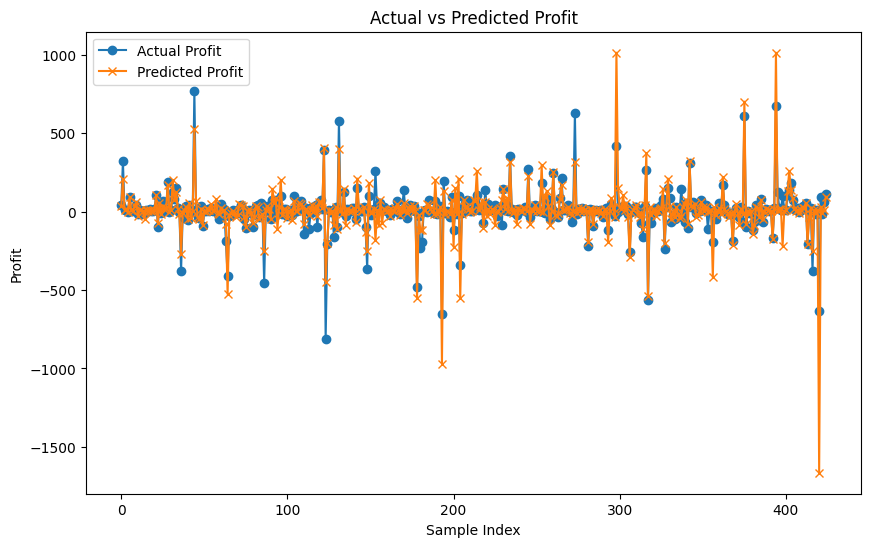

In [30]:
# Plot actual vs predicted values for test data
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Profit', marker='o')
plt.plot(y_pred_test, label='Predicted Profit', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Profit')
plt.title('Actual vs Predicted Profit')
plt.legend()
plt.show()

## 5. Summary

### Defining Features and Target Variable:

Features (X): All columns except 'Profit'.
Target (y): 'Profit'.

### Data Splitting:

Split data into training (80%) and test sets (20%).

### Model Training:

Trained a Decision Tree Regressor using the training data.

### Model Evaluation:

Made predictions on both training and test sets.
Evaluated using MSE, MAE.
Plotted actual vs. predicted profit values for test data.

### Results

Training Data Evaluation:
MSE, MAE indicate model performance.
Test Data Evaluation:
Similar metrics to assess generalization to unseen data.
Plot shows comparison of actual and predicted profits.

### Key Findings

Decision Tree model showed good performance but potential overfitting.
Visualizations helped in understanding model accuracy and areas for improvement.